In [452]:
import numpy as np
import pandas as pd
import random
import math
import statistics as stat
import matplotlib.pyplot as plt
from scipy import stats
import itertools
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import bisect
from simul_file import mmn_queueing_jsq, queue_length_time_graph, \
                        mmn_queueing_redundancy_dos, mmn_queueing_redundancy_doc, \
                        mmn_queueing_redundancy_dos_identical, \
                        mmn_queueing_redundancy_doc_identical, \
                        mmn_queueing_redundancy_dos_weibull, \
                        mmn_queueing_redundancy_doc_weibull,\
                        mmn_queueing_jsq_weibull, weibull_scale_calculator, \
                        system_compare
data1 = pd.read_excel("result_data.xlsx",sheet_name="simutime")
data2 = pd.read_excel("result_data.xlsx",sheet_name="homo")
data3 = pd.read_excel("result_data.xlsx",sheet_name="heter")


In [ ]:
mmn_queueing_jsq(n,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan,policy="jsq1")
queue_length_time_graph(event_calendar,other_stat,gtype="queue",sq_no=math.nan)
mmn_queueing_redundancy_dos(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_dos_identical(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc_identical(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_dos_weibull(n,d,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc_weibull(n,d,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
mmn_queueing_jsq_weibull(n,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
weibull_scale_calculator(desired_mean,shape)
system_compare(system1,system2)

In [5]:
aaa = mmn_queueing_jsq(4,8,2.2,simulation_time=3000,simuseed=8,policy="jsq1")
bbb = mmn_queueing_redundancy_dos(4,4,8,2.2,simulation_time=3000,simuseed=8)
#ccc = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=1000,simuseed=8)

In [4]:
dm = 1/2.2
shp = 1
aaa = mmn_queueing_jsq_weibull(5,10,weibull_scale_calculator(dm,shp),2,simulation_time=1000,simuseed=8)

In [5]:
dm = 1/2.2
shp = 1
bbb = mmn_queueing_redundancy_dos_weibull(5,5,10,weibull_scale_calculator(dm,shp),\
                                          shp,simulation_time=1000,simuseed=8)
ccc = mmn_queueing_redundancy_doc_weibull(5,5,10,weibull_scale_calculator(dm,shp),\
                                          shp,simulation_time=1000,simuseed=8)

In [ ]:
system_compare(aaa,bbb)

In [ ]:
lb = 3
ub = 14

sys1 = np.array([])
sys2 = np.array([])
sys3 = np.array([])
for i in range(lb,ub):
    sys1 = np.append(sys1,mmn_queueing_jsq(5,i,[3,1,4,2,5],simulation_time=300,simuseed=66,policy="jsq1")[5]['Grand Average cycle time'][0])
    sys2 = np.append(sys2,mmn_queueing_redundancy_dos(5,5,i,[3,1,4,2,5],simulation_time=300,simuseed=66)[5]['Grand Average cycle time'][0])
    sys3 = np.append(sys3,mmn_queueing_redundancy_doc(5,5,i,[3,1,4,2,5],simulation_time=300,simuseed=66)[5]['Grand Average cycle time'][0])


plt.plot(np.arange(lb,ub),sys1,label='system1')
plt.plot(np.arange(lb,ub),sys2,label='system2')
plt.plot(np.arange(lb,ub),sys3,label='system3')
plt.title('Comparison of three systems')
plt.xlabel('Arrival rate')
plt.ylabel('ACT')
plt.legend()

In [36]:
aaa = mmn_queueing_jsq(5,14,[3,1,4,2,5],simulation_time=1000,simuseed=66,policy="jsq1")

In [42]:
bbb = mmn_queueing_jsq(5,15.01,[3,1,4,2,5],simulation_time=1000,simuseed=88,policy="jsq1")

How long is long?

In [44]:
aaa = mmn_queueing_jsq(4,8,2.2,simulation_time=4000,simuseed=5,policy="jsq1")

In [3]:
bbb = mmn_queueing_jsq(4,8,2.2,simulation_time=4000,simuseed=1,policy="jiq1")

In [22]:
ccc = mmn_queueing_jsq(4,8,2.2,simulation_time=4000,simuseed=2,policy="jswq")

In [30]:
ddd = mmn_queueing_redundancy_dos(4,4,8,2.2,simulation_time=4000,simuseed=4)

In [34]:
eee = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=4000,simuseed=2)

In [ ]:
aaa[8][aaa[8]['Finish']<2000]

In [ ]:
aaa[8]

In [48]:
def howlongislong(system1,system2,system3,system4,system5):
    
    a1 = system1[0].iloc[np.where(system1[0]["Time"][1:].to_numpy() != system1[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    b2 = system2[0].iloc[np.where(system2[0]["Time"][1:].to_numpy() != system2[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    c3 = system3[0].iloc[np.where(system3[0]["Time"][1:].to_numpy() != system3[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    d4 = system4[0].iloc[np.where(system4[0]["Time"][1:].to_numpy() != system4[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    e5 = system5[0].iloc[np.where(system5[0]["Time"][1:].to_numpy() != system5[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    
    sys1_timing = system1[8]
    sys1_timing['act'] = sys1_timing['Finish'] - sys1_timing['Start']
    sys1_timing['cma'] = sys1_timing['act'].expanding().mean()
    sys2_timing = system2[8]
    sys2_timing['act'] = sys2_timing['Finish'] - sys2_timing['Start']
    sys2_timing['cma'] = sys2_timing['act'].expanding().mean()
    sys3_timing = system3[8]
    sys3_timing['act'] = sys3_timing['Finish'] - sys3_timing['Start']
    sys3_timing['cma'] = sys3_timing['act'].expanding().mean()
    sys4_timing = system4[8]
    sys4_timing['act'] = sys4_timing['Finish'] - sys4_timing['Start']
    sys4_timing['cma'] = sys4_timing['act'].expanding().mean()
    sys5_timing = system5[8]
    sys5_timing['act'] = sys5_timing['Finish'] - sys5_timing['Start']
    sys5_timing['cma'] = sys5_timing['act'].expanding().mean()

    plt.plot(a1['Time'],sys1_timing['cma'],label='jsq')
    plt.plot(b2['Time'],sys2_timing['cma'],label='jiq')
    plt.plot(c3['Time'],sys3_timing['cma'],label='jswq')
    plt.plot(d4['Time'],sys4_timing['cma'],label='DOS')
    plt.plot(e5['Time'],sys5_timing['cma'],label='DOC')
    plt.title('ACT vs Time Graph')
    plt.xlabel('Time')
    plt.ylabel('ACT')
    plt.legend()
    

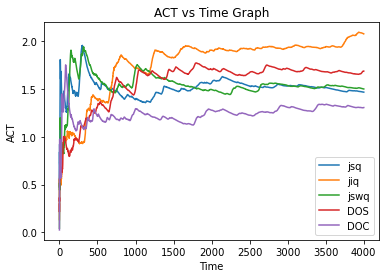

In [49]:
howlongislong(aaa,bbb,ccc,ddd,eee)

In [337]:
s1d = 30
#aaa = mmn_queueing_jsq_weibull(4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#bbb = mmn_queueing_redundancy_dos_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#ddd = mmn_queueing_jsq(4,8,2.2,simulation_time=4000,simuseed=s1d,policy='jiq1')
#eee = mmn_queueing_jsq(4,8,2.2,simulation_time=4000,simuseed=s1d,policy='jsq1')
fff = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=4000,simuseed=s1d)

In [ ]:
system_compare(fff,eee)

In [ ]:
fff[8]

In [50]:
stats.ttest_rel(data1['jsq_2000'], data1['jsq_4000'])

Ttest_relResult(statistic=0.6235277145514919, pvalue=0.53656774714141)

In [51]:
stats.ttest_rel(data1['jiq_2000'], data1['jiq_4000'])

Ttest_relResult(statistic=0.46367188623859523, pvalue=0.6454603855924186)

In [52]:
stats.ttest_rel(data1['jswq_2000'], data1['jswq_4000'])

Ttest_relResult(statistic=0.6235277145514919, pvalue=0.53656774714141)

In [53]:
stats.ttest_rel(data1['dos_2000'], data1['dos_4000'])

Ttest_relResult(statistic=-0.7595495376631464, pvalue=0.45209084262645827)

In [54]:
stats.ttest_rel(data1['doc_2000'], data1['doc_4000'])

Ttest_relResult(statistic=-0.2864186565457613, pvalue=0.7760735547786916)

In [61]:
stat.mean(data1['dos_2000'])

1.444892025

In [62]:
stat.mean(data1['dos_4000'])

1.46128565

Stability Analysis

In [64]:
#stab_sys = mmn_queueing_jsq(4,8,2.2,simulation_time=2000,simuseed=66,policy='jsq1')

In [179]:
def stab(system1,system2):
    
    a1 = system1[0].iloc[np.where(system1[0]["Time"][1:].to_numpy() != system1[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    b2 = system2[0].iloc[np.where(system2[0]["Time"][1:].to_numpy() != system2[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    
    plt.figure(1)
    plt.plot(a1['Time'],a1['Live_track'],label='stable system')
    plt.plot(b2['Time'],b2['Live_track'],label=comp_model)
    plt.xlabel('Time')
    plt.ylabel('# Customers')
    plt.legend()
    
    
#     a0pos = system1[0]['Time'].to_numpy()[np.where(system1[0]['Server1 Queue']==0)[0]]
#     b0pos = system2[0]['Time'].to_numpy()[np.where(system2[0]['Server1 Queue']==0)[0]]
#     data = [a0pos, b0pos]
#     fig, ax = plt.subplots()
#     ax.boxplot(data,vert=False)
#     ax.set_yticklabels(['Stable system', comp_model])
#     ax.set_xlabel('Simulation Time')
#     plt.show()
    
    #plt.savefig('my_plot.jpg')
    

In [200]:
comp_model = 'DOC'
#aaa = mmn_queueing_jsq_weibull(4,8,scl_dec,0.5,simulation_time=2000,simuseed=1)
bbb = mmn_queueing_redundancy_doc_weibull(4,4,8,scl_dec,0.5,simulation_time=2000,simuseed=1)
#ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,scl_dec,0.5,simulation_time=2000,simuseed=1)
#ddd = mmn_queueing_jsq(4,8,[1.5,2,4,1],simulation_time=2000,simuseed=1,policy=comp_model)
#eee = mmn_queueing_jsq(4,8,2.2,simulation_time=2000,simuseed=s1d,policy=comp_model)
#fff = mmn_queueing_redundancy_doc_identical(4,4,8,[1.5,2,4,1],simulation_time=2000,simuseed=1)

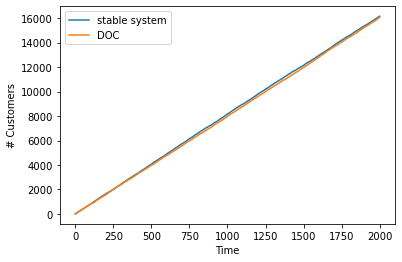

In [201]:
stab(stab_sys,bbb)

Homo

In [831]:
s1d = 13
#aaa = mmn_queueing_jsq_weibull(4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#bbb = mmn_queueing_redundancy_dos_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)

In [ ]:
system_compare(ccc,ddd)

In [ ]:
ccc[8]

In [425]:
#abcde = data2.iloc[:,:6]
#abcde.columns = ['jsq1','jsq2','jiq','jswq','DOS','DOC']
# abcde = data2.iloc[:,10:12]
# abcde.columns = ['jsq1_weibull_inc','dos_weibull_inc']
# abcde = data2.iloc[:,14:17]
# abcde.columns = ['jsq1_weibull_dec','dos_weibull_dec','doc_weibull_dec']
abcde = data3.iloc[:,14:17]
abcde.columns = ['jsq1_weibull_dec','dos_weibull_dec','doc_weibull_dec']

In [426]:
abcde.describe().round(3)

,jsq1_weibull_dec,dos_weibull_dec,doc_weibull_dec
count,40.000,40.000,40.000
mean,5.849,5.512,0.063
std,1.693,3.382,0.003
min,3.676,2.701,0.054
25%,4.957,4.012,0.061
50%,5.510,4.511,0.064
75%,6.488,5.625,0.065
max,12.543,23.377,0.070


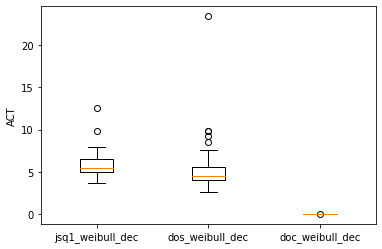

In [428]:
fig, ax = plt.subplots()
ax.boxplot(abcde)
#ax.set_xticklabels(['jsq1','jsq2','jiq1','jswq','DOS','DOC'])
#ax.set_xticklabels(['jsq1_weibull_inc','dos_weibull_inc'])
ax.set_xticklabels(['jsq1_weibull_dec','dos_weibull_dec','doc_weibull_dec'])
#ax.set_xticklabels(['jsq1','jsq2','jswq','DOS','DOC'])
ax.set_ylabel('ACT')
plt.show()

In [241]:
stats.ttest_rel(abcde['jsq1'], abcde['jswq'])

Ttest_relResult(statistic=2.8311767550694005, pvalue=0.0072970001501378185)

In [429]:
col_n = abcde.columns
res = np.zeros([3,3])
for i in range(3):
    for j in range(3):
        res[i,j] = stats.ttest_rel(abcde[col_n[i]], abcde[col_n[j]])[1].round(3)
res_df = pd.DataFrame(res)
res_df.columns = col_n
res_df.index = col_n
res_df

,jsq1_weibull_dec,dos_weibull_dec,doc_weibull_dec
jsq1_weibull_dec,NaN,0.513,0.0
dos_weibull_dec,0.513,NaN,0.0
doc_weibull_dec,0.000,0.000,NaN


In [430]:
col_n = abcde.columns
res = np.zeros([3,3])
for i in range(3):
    for j in range(3):
        res[i,j] = stats.ttest_rel(abcde[col_n[i]], abcde[col_n[j]])[0].round(3)
res_df = pd.DataFrame(res)
res_df.columns = col_n
res_df.index = col_n
res_df

,jsq1_weibull_dec,dos_weibull_dec,doc_weibull_dec
jsq1_weibull_dec,NaN,0.660,21.633
dos_weibull_dec,-0.660,NaN,10.194
doc_weibull_dec,-21.633,-10.194,NaN


Hetero

In [170]:
scl_inc = [weibull_scale_calculator(1/1.5,2),weibull_scale_calculator(1/2,2),\
           weibull_scale_calculator(1/4,2),weibull_scale_calculator(1/1,2)]

scl_dec = [weibull_scale_calculator(1/1.5,0.5),weibull_scale_calculator(1/2,0.5),\
           weibull_scale_calculator(1/4,0.5),weibull_scale_calculator(1/1,0.5)]

In [750]:
s1d = 40
aaa = mmn_queueing_jsq_weibull(4,8,scl_dec,0.5,simulation_time=2000,simuseed=s1d)
bbb = mmn_queueing_redundancy_dos_weibull(4,4,8,scl_dec,0.5,simulation_time=2000,simuseed=s1d)
#ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,scl_dec,0.5,simulation_time=2000,simuseed=s1d)
#ddd = mmn_queueing_jsq(4,8,[1.5,2,4,1],simulation_time=2000,simuseed=s1d,policy='jsq2')
#eee = mmn_queueing_jsq(4,8,2.2,simulation_time=2000,simuseed=s1d,policy='jsq1')
#fff = mmn_queueing_redundancy_dos_identical(4,4,8,[1.5,2,4,1],simulation_time=2000,simuseed=s1d)

In [ ]:
system_compare(aaa,bbb)

In [ ]:
aaa[8]

In [ ]:
bbb[8]

other

All stable homo

In [ ]:
system_compare(hetero_weibull_dos_dec,hetero_weibull_doc_dec)

In [ ]:
hetero_weibull_doc_dec[8]

In [275]:
stab_sys = mmn_queueing_jsq(4,8,8.2,simulation_time=5000,simuseed=1) #homo_exp_jsq1

In [292]:
homo_exp_jsq2 = mmn_queueing_jsq(4,8,8.2,simulation_time=5000,simuseed=2,policy='jsq2')

In [293]:
homo_exp_jiq1 = mmn_queueing_jsq(4,8,8.2,simulation_time=5000,simuseed=3,policy='jiq1')

In [294]:
homo_exp_jswq = mmn_queueing_jsq(4,8,8.2,simulation_time=5000,simuseed=4,policy='jswq')

In [302]:
homo_exp_dos = mmn_queueing_redundancy_dos(4,4,8,8.2,simulation_time=5000,simuseed=5)

In [303]:
homo_exp_doc = mmn_queueing_redundancy_doc(4,4,8,8.2,simulation_time=5000,simuseed=6)

In [307]:
homo_exp_ident_dos = mmn_queueing_redundancy_dos_identical(4,4,8,8.2,simulation_time=5000,simuseed=7)

In [308]:
homo_exp_ident_doc = mmn_queueing_redundancy_doc_identical(4,4,8,8.2,simulation_time=5000,simuseed=8)

In [312]:
homo_weibull_jsq1_inc = mmn_queueing_jsq_weibull(4,8,weibull_scale_calculator(1/8.2,2),2,simulation_time=5000,simuseed=9)

In [313]:
homo_weibull_dos_inc = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/8.2,2),2,simulation_time=5000,simuseed=10)

In [317]:
homo_weibull_doc_inc = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/8.2,2),2,simulation_time=5000,simuseed=11)

In [318]:
homo_weibull_jsq1_dec = mmn_queueing_jsq_weibull(4,8,weibull_scale_calculator(1/8.2,0.5),0.5,simulation_time=5000,simuseed=12)

In [322]:
homo_weibull_dos_dec = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/8.2,0.5),0.5,simulation_time=5000,simuseed=13)

In [324]:
homo_weibull_doc_dec = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/8.2,0.5),0.5,simulation_time=5000,simuseed=14)

All stable hetero

In [328]:
hetero_exp_jsq1 = mmn_queueing_jsq(4,8,[6,8,16,4],simulation_time=5000,simuseed=1)

In [329]:
hetero_exp_jsq2 = mmn_queueing_jsq(4,8,[6,8,16,4],simulation_time=5000,simuseed=2,policy='jsq2')

In [330]:
hetero_exp_jiq1 = mmn_queueing_jsq(4,8,[6,8,16,4],simulation_time=5000,simuseed=3,policy='jiq1')

In [331]:
hetero_exp_jswq = mmn_queueing_jsq(4,8,[6,8,16,4],simulation_time=5000,simuseed=4,policy='jswq')

In [338]:
hetero_exp_dos = mmn_queueing_redundancy_dos(4,4,8,[6,8,16,4],simulation_time=5000,simuseed=5)

In [339]:
hetero_exp_doc = mmn_queueing_redundancy_doc(4,4,8,[6,8,16,4],simulation_time=5000,simuseed=6)

In [340]:
hetero_exp_ident_dos = mmn_queueing_redundancy_dos_identical(4,4,8,[6,8,16,4],simulation_time=5000,simuseed=7)

In [341]:
hetero_exp_ident_doc = mmn_queueing_redundancy_doc_identical(4,4,8,[6,8,16,4],simulation_time=5000,simuseed=8)

In [348]:
hetero_weibull_jsq1_inc = mmn_queueing_jsq_weibull(4,8,[weibull_scale_calculator(1/6,2),weibull_scale_calculator(1/8,2),\
                                                 weibull_scale_calculator(1/16,2),weibull_scale_calculator(1/4,2)],
                                                 2,simulation_time=5000,simuseed=9)

In [349]:
hetero_weibull_dos_inc = mmn_queueing_redundancy_doc_weibull(4,4,8,[weibull_scale_calculator(1/6,2),weibull_scale_calculator(1/8,2),\
                                                 weibull_scale_calculator(1/16,2),weibull_scale_calculator(1/4,2)],
                                                             2,simulation_time=5000,simuseed=10)

In [353]:
hetero_weibull_doc_inc = mmn_queueing_redundancy_doc_weibull(4,4,8,[weibull_scale_calculator(1/6,2),weibull_scale_calculator(1/8,2),\
                                                 weibull_scale_calculator(1/16,2),weibull_scale_calculator(1/4,2)],
                                                             2,simulation_time=5000,simuseed=11)

In [354]:
hetero_weibull_jsq1_dec = mmn_queueing_jsq_weibull(4,8,[weibull_scale_calculator(1/6,0.5),weibull_scale_calculator(1/8,0.5),\
                                                 weibull_scale_calculator(1/16,0.5),weibull_scale_calculator(1/4,0.5)],
                                                   0.5,simulation_time=5000,simuseed=12)

In [364]:
hetero_weibull_dos_dec = mmn_queueing_redundancy_doc_weibull(4,4,8,[weibull_scale_calculator(1/6,0.5),weibull_scale_calculator(1/8,0.5),\
                                                 weibull_scale_calculator(1/16,0.5),weibull_scale_calculator(1/4,0.5)],
                                                             0.5,simulation_time=5000,simuseed=13)

In [365]:
hetero_weibull_doc_dec = mmn_queueing_redundancy_doc_weibull(4,4,8,[weibull_scale_calculator(1/6,0.5),weibull_scale_calculator(1/8,0.5),\
                                                 weibull_scale_calculator(1/16,0.5),weibull_scale_calculator(1/4,0.5)],
                                                        0.5,simulation_time=5000,simuseed=14)

All unstable homo

In [ ]:
unstable_homo_weibull_doc_dec[6]

In [369]:
unstable_homo_exp_jsq1 = mmn_queueing_jsq(4,8,1.2,simulation_time=5000,simuseed=1)

In [370]:
unstable_homo_exp_jsq2 = mmn_queueing_jsq(4,8,1.2,simulation_time=5000,simuseed=2,policy='jsq2')

In [385]:
unstable_homo_exp_jiq1 = mmn_queueing_jsq(4,8,1.2,simulation_time=5000,simuseed=3,policy='jiq1')

In [386]:
unstable_homo_exp_jswq = mmn_queueing_jsq(4,8,1.2,simulation_time=5000,simuseed=4,policy='jswq')

In [389]:
unstable_homo_exp_dos = mmn_queueing_redundancy_dos(4,4,8,1.2,simulation_time=5000,simuseed=5)

In [390]:
unstable_homo_exp_doc = mmn_queueing_redundancy_doc(4,4,8,1.2,simulation_time=5000,simuseed=6)

In [393]:
unstable_homo_exp_ident_dos = mmn_queueing_redundancy_dos_identical(4,4,8,1.2,simulation_time=5000,simuseed=7)

In [394]:
unstable_homo_exp_ident_doc = mmn_queueing_redundancy_doc_identical(4,4,8,1.2,simulation_time=5000,simuseed=8)

In [397]:
unstable_homo_weibull_jsq1_inc = mmn_queueing_jsq_weibull(4,8,weibull_scale_calculator(1/1.2,2),2,simulation_time=5000,simuseed=9)

In [398]:
unstable_homo_weibull_dos_inc = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/1.2,2),2,simulation_time=5000,simuseed=10)

In [406]:
unstable_homo_weibull_doc_inc = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/1.2,2),2,simulation_time=5000,simuseed=11)

In [407]:
unstable_homo_weibull_jsq1_dec = mmn_queueing_jsq_weibull(4,8,weibull_scale_calculator(1/1.2,0.5),0.5,simulation_time=5000,simuseed=12)

In [410]:
unstable_homo_weibull_dos_dec = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/1.2,0.5),0.5,simulation_time=5000,simuseed=13)

In [411]:
unstable_homo_weibull_doc_dec = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/1.2,0.5),0.5,simulation_time=5000,simuseed=14)

All unstable hetero

In [451]:
unstable_hetero_weibull_dos_dec[6]

,Server1,Server2,Server3,Server4,Grand total
Arrived customers,7076,13961,8934,9864,39835
Completed services,7070,13955,8928,9858,39811


In [414]:
unstable_hetero_exp_jsq1 = mmn_queueing_jsq(4,8,[0.5,2,0.8,1],simulation_time=5000,simuseed=1)

In [415]:
unstable_hetero_exp_jsq2 = mmn_queueing_jsq(4,8,[0.5,2,0.8,1],simulation_time=5000,simuseed=2,policy='jsq2')

In [416]:
unstable_hetero_exp_jiq1 = mmn_queueing_jsq(4,8,[0.5,2,0.8,1],simulation_time=5000,simuseed=3,policy='jiq1')

In [417]:
unstable_hetero_exp_jswq = mmn_queueing_jsq(4,8,[0.5,2,0.8,1],simulation_time=5000,simuseed=4,policy='jswq')

In [431]:
unstable_hetero_exp_dos = mmn_queueing_redundancy_dos(4,4,8,[0.5,2,0.8,1],simulation_time=5000,simuseed=5)

In [432]:
unstable_hetero_exp_doc = mmn_queueing_redundancy_doc(4,4,8,[0.5,2,0.8,1],simulation_time=5000,simuseed=6)

In [435]:
unstable_hetero_exp_ident_dos = mmn_queueing_redundancy_dos_identical(4,4,8,[0.5,2,0.8,1],simulation_time=5000,simuseed=7)

In [436]:
unstable_hetero_exp_ident_doc = mmn_queueing_redundancy_doc_identical(4,4,8,[0.5,2,0.8,1],simulation_time=5000,simuseed=8)

In [439]:
unstable_hetero_weibull_jsq1_inc = mmn_queueing_jsq_weibull(4,8,[weibull_scale_calculator(1/0.5,2),weibull_scale_calculator(1/2,2),\
                                                 weibull_scale_calculator(1/0.8,2),weibull_scale_calculator(1/1,2)],
                                                 2,simulation_time=5000,simuseed=9)

In [440]:
unstable_hetero_weibull_dos_inc = mmn_queueing_redundancy_doc_weibull(4,4,8,[weibull_scale_calculator(1/0.5,2),weibull_scale_calculator(1/2,2),\
                                                 weibull_scale_calculator(1/0.8,2),weibull_scale_calculator(1/1,2)],
                                                             2,simulation_time=5000,simuseed=10)

In [443]:
unstable_hetero_weibull_doc_inc = mmn_queueing_redundancy_doc_weibull(4,4,8,[weibull_scale_calculator(1/0.5,2),weibull_scale_calculator(1/2,2),\
                                                 weibull_scale_calculator(1/0.8,2),weibull_scale_calculator(1/1,2)],
                                                             2,simulation_time=5000,simuseed=11)

In [444]:
unstable_hetero_weibull_jsq1_dec = mmn_queueing_jsq_weibull(4,8,[weibull_scale_calculator(1/0.5,0.5),weibull_scale_calculator(1/2,0.5),\
                                                 weibull_scale_calculator(1/0.8,0.5),weibull_scale_calculator(1/1,0.5)],
                                                   0.5,simulation_time=5000,simuseed=12)

In [447]:
unstable_hetero_weibull_dos_dec = mmn_queueing_redundancy_doc_weibull(4,4,8,[weibull_scale_calculator(1/0.5,0.5),weibull_scale_calculator(1/2,0.5),\
                                                 weibull_scale_calculator(1/0.8,0.5),weibull_scale_calculator(1/1,0.5)],
                                                             0.5,simulation_time=5000,simuseed=13)

In [448]:
unstable_hetero_weibull_doc_dec = mmn_queueing_redundancy_doc_weibull(4,4,8,[weibull_scale_calculator(1/0.5,0.5),weibull_scale_calculator(1/2,0.5),\
                                                 weibull_scale_calculator(1/0.8,0.5),weibull_scale_calculator(1/1,0.5)],
                                                        0.5,simulation_time=5000,simuseed=14)

In [269]:
oo2 = mmn_queueing_jsq(4,8,2.2,simulation_time=1000,simuseed=1)

In [273]:
oo1 = mmn_queueing_redundancy_doc_identical(4,4,8,8.2,simulation_time=1000,simuseed=1)

In [281]:
oo3 = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/8.2,2),2,simulation_time=1000,simuseed=1)

In [286]:
oo4 = mmn_queueing_jsq(4,8,[6,8,16,4],simulation_time=1000,simuseed=1,policy='jiq1')

In [288]:
oo5 = mmn_queueing_redundancy_doc_identical(4,4,8,[6,8,16,4],simulation_time=1000,simuseed=1)

In [290]:
oo6 = mmn_queueing_redundancy_doc_weibull(4,4,8,[weibull_scale_calculator(1/6,2),weibull_scale_calculator(1/8,2),\
                                                 weibull_scale_calculator(1/16,2),weibull_scale_calculator(1/4,2)],
                                          2,simulation_time=1000,simuseed=1)

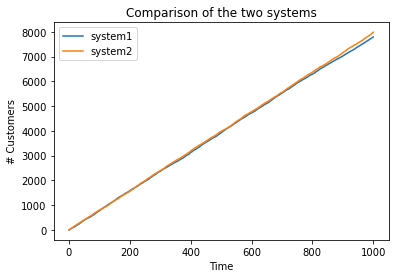

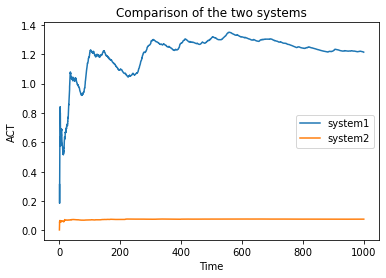

In [291]:
system_compare(oo2,oo6)

More

In [455]:
ayy1 = mmn_queueing_redundancy_dos(4,4,8,2.2,simulation_time=1000,simuseed=1)

In [456]:
ayy2 = mmn_queueing_redundancy_dos(4,3,8,2.2,simulation_time=1000,simuseed=2)

In [457]:
ayy3 = mmn_queueing_redundancy_dos(4,2,8,2.2,simulation_time=1000,simuseed=3)

In [458]:
ayy4 = mmn_queueing_redundancy_dos(4,1,8,2.2,simulation_time=1000,simuseed=4)

In [473]:
ayy5 = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=3000,simuseed=5)

In [464]:
ayy6 = mmn_queueing_redundancy_doc(4,3,8,2.2,simulation_time=1000,simuseed=6)

In [465]:
ayy7 = mmn_queueing_redundancy_doc(4,2,8,2.2,simulation_time=1000,simuseed=7)

In [474]:
ayy8 = mmn_queueing_redundancy_doc(4,1,8,2.2,simulation_time=3000,simuseed=8)

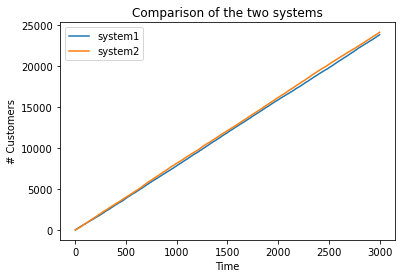

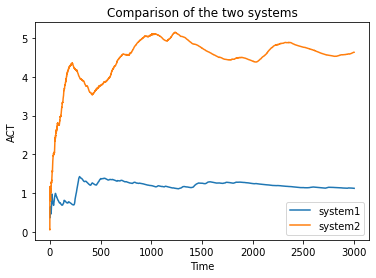

In [475]:
system_compare(ayy5,ayy8)